In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

In [2]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 2) # making some data up with scikit-learn

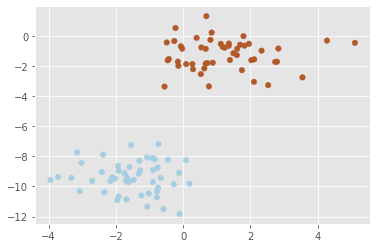

In [3]:
axes = plt.axes()

axes.scatter(X[:,0], X[:,1], c = y, s = 30, cmap = plt.cm.Paired)

In [6]:
model = svm.SVC(kernel = "linear") # kernel can be changed to result in different types of dimensionality

In [7]:
model.fit(X, y)

SVC(kernel='linear')

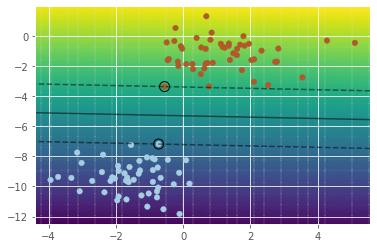

In [8]:
axes = plt.axes() 
axes.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.Paired)

# grid of points to evaluate - make a grid from the graph above

# we want to create margin lines and our optimal hyperplane 

xlim = axes.get_xlim()
ylim = axes.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy)
ZZ = Z.reshape(XX.shape)


axes.scatter(xy[:,0],xy[:,1],marker="s",c=Z,s=10, zorder=-10)
axes.contour(XX, YY, ZZ, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.show()